In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Poker Dataset

In [3]:
poker = pd.read_csv("pokerNoise.csv")

In [4]:
poker2 = poker.head(500000)

In [5]:
data = poker2.iloc[:,0:10]
labelsnum = poker2.iloc[:,10]
labels = pd.Series((str(i) for i in labelsnum))

In [6]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         11       0.00      0.00      0.00     19275
         10       0.00      0.00      0.00     19343
         13       0.00      0.00      0.00     19051
         12       0.00      0.00      0.00     19041
          1       0.08      0.02      0.03     19142
          3       0.10      0.00      0.00     19473
          2       0.07      0.00      0.00     19404
          5       0.09      0.00      0.00     19454
          4       0.08      0.07      0.07     19146
          7       0.08      0.90      0.14     18987
          6       0.00      0.00      0.00     19100
          9       0.08      0.02      0.03     19381
          8       0.00      0.00      0.00     19203

avg / total       0.04      0.08      0.02    250000

accuracy:  0.076276


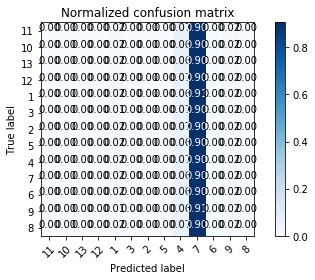

             precision    recall  f1-score   support

         11       0.08      0.08      0.08     19164
         10       0.00      0.00      0.00     19259
         13       0.08      0.02      0.03     19129
         12       0.00      0.00      0.00     19116
          1       0.08      0.90      0.14     19071
          3       0.00      0.00      0.00     19295
          2       0.00      0.00      0.00     19513
          5       0.00      0.00      0.00     19210
          4       0.00      0.00      0.00     19179
          7       0.09      0.00      0.00     19364
          6       0.00      0.00      0.00     19038
          9       0.08      0.00      0.01     19258
          8       0.00      0.00      0.00     19404

avg / total       0.03      0.08      0.02    250000

accuracy:  0.076324


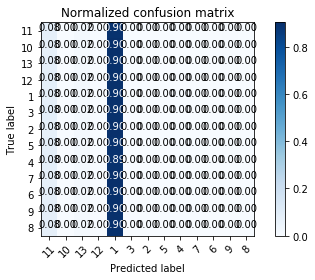

             precision    recall  f1-score   support

         11       0.08      0.02      0.03     19381
         10       0.07      0.00      0.00     19316
         13       0.00      0.00      0.00     19034
         12       0.00      0.00      0.00     19084
          1       0.08      0.92      0.14     18896
          3       0.00      0.00      0.00     19524
          2       0.10      0.00      0.00     19333
          5       0.00      0.00      0.00     19223
          4       0.08      0.07      0.07     19161
          7       0.00      0.00      0.00     19346
          6       0.09      0.00      0.00     19035
          9       0.00      0.00      0.00     19365
          8       0.00      0.00      0.00     19302

avg / total       0.04      0.08      0.02    250000

accuracy:  0.075912


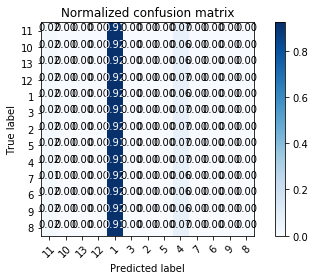

             precision    recall  f1-score   support

         11       0.11      0.00      0.00     19058
         10       0.00      0.00      0.00     19286
         13       0.00      0.00      0.00     19146
         12       0.10      0.00      0.00     19073
          1       0.00      0.00      0.00     19317
          3       0.08      0.02      0.03     19244
          2       0.09      0.00      0.00     19584
          5       0.00      0.00      0.00     19441
          4       0.00      0.00      0.00     19164
          7       0.08      0.92      0.14     19005
          6       0.00      0.00      0.00     19103
          9       0.00      0.00      0.00     19274
          8       0.08      0.06      0.07     19305

avg / total       0.04      0.08      0.02    250000

accuracy:  0.076108


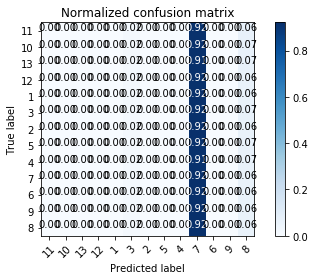

             precision    recall  f1-score   support

         11       0.07      0.02      0.03     19023
         10       0.00      0.00      0.00     19397
         13       0.07      0.02      0.03     19143
         12       0.00      0.00      0.00     19045
          1       0.00      0.00      0.00     19111
          3       0.00      0.00      0.00     19465
          2       0.10      0.00      0.00     19381
          5       0.00      0.00      0.00     19411
          4       0.08      0.07      0.07     19117
          7       0.08      0.90      0.14     19223
          6       0.50      0.00      0.00     18988
          9       0.08      0.00      0.00     19370
          8       0.00      0.00      0.00     19326

avg / total       0.08      0.08      0.02    250000

accuracy:  0.0771


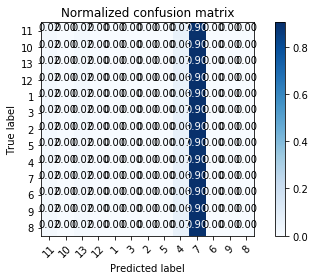

             precision    recall  f1-score   support

         11       1.00      0.00      0.00     19416
         10       0.00      0.00      0.00     19205
         13       0.00      0.00      0.00     19037
         12       0.00      0.00      0.00     19112
          1       0.00      0.00      0.00     19102
          3       0.00      0.00      0.00     19303
          2       0.10      0.00      0.00     19536
          5       0.00      0.00      0.00     19253
          4       0.08      0.07      0.07     19208
          7       0.08      0.92      0.14     19128
          6       0.00      0.00      0.00     19150
          9       0.07      0.02      0.03     19269
          8       0.00      0.00      0.00     19281

avg / total       0.10      0.08      0.02    250000

accuracy:  0.077084


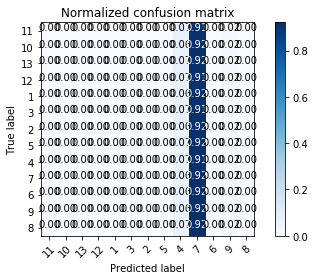

             precision    recall  f1-score   support

         11       0.00      0.00      0.00     19112
         10       0.00      0.00      0.00     19175
         13       0.00      0.00      0.00     19024
         12       0.07      0.02      0.03     19065
          1       0.00      0.00      0.00     19176
          3       0.14      0.00      0.00     19471
          2       0.07      0.00      0.00     19340
          5       0.00      0.00      0.00     19424
          4       0.00      0.00      0.00     19299
          7       0.08      0.90      0.14     19135
          6       0.00      0.00      0.00     19151
          9       0.07      0.06      0.07     19343
          8       0.07      0.02      0.03     19285

avg / total       0.04      0.08      0.02    250000

accuracy:  0.076432


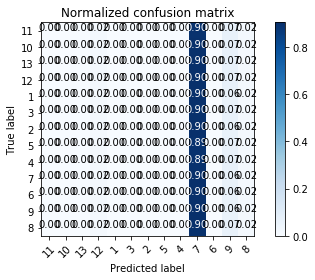

             precision    recall  f1-score   support

         11       0.08      0.02      0.03     19327
         10       0.07      0.01      0.02     19427
         13       0.06      0.00      0.00     19156
         12       0.10      0.00      0.00     19092
          1       0.00      0.00      0.00     19037
          3       0.00      0.00      0.00     19297
          2       0.29      0.00      0.00     19577
          5       0.00      0.00      0.00     19240
          4       0.08      0.07      0.07     19026
          7       0.08      0.90      0.14     19216
          6       1.00      0.00      0.00     18987
          9       0.00      0.00      0.00     19296
          8       0.09      0.00      0.00     19322

avg / total       0.14      0.08      0.02    250000

accuracy:  0.076932


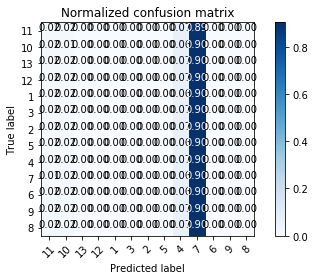

             precision    recall  f1-score   support

         11       0.09      0.00      0.00     19351
         10       0.00      0.00      0.00     19366
         13       0.07      0.02      0.03     18998
         12       0.07      0.00      0.00     18983
          1       0.00      0.00      0.00     19033
          3       0.08      0.02      0.03     19411
          2       0.15      0.00      0.00     19676
          5       0.12      0.00      0.00     19478
          4       0.08      0.07      0.07     19017
          7       0.08      0.91      0.14     19161
          6       0.13      0.00      0.00     19060
          9       0.00      0.00      0.00     19212
          8       0.00      0.00      0.00     19254

avg / total       0.07      0.08      0.02    250000

accuracy:  0.077196


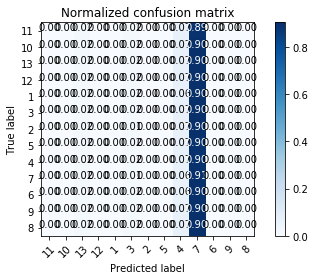

             precision    recall  f1-score   support

         11       0.08      0.08      0.08     19088
         10       0.00      0.00      0.00     19236
         13       0.00      0.00      0.00     19182
         12       0.00      0.00      0.00     19174
          1       0.00      0.00      0.00     19180
          3       0.00      0.00      0.00     19357
          2       0.04      0.00      0.00     19241
          5       0.00      0.00      0.00     19186
          4       0.00      0.00      0.00     19308
          7       0.08      0.92      0.14     19190
          6       0.00      0.00      0.00     19078
          9       0.09      0.00      0.00     19427
          8       0.00      0.00      0.00     19353

avg / total       0.02      0.08      0.02    250000

accuracy:  0.076892


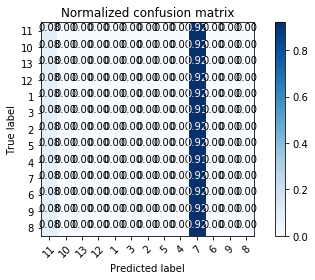

In [7]:
for i in range(5):
    for train_index, test_index in kf.split(poker2):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model_poker = MultinomialNB()
        dt_model_poker.fit(X_train, y_train)
        predicted = dt_model_poker.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Nursery Dataset

In [8]:
nurse = pd.read_csv("nureryNoise.csv")

In [9]:
data = nurse.iloc[:,0:8]
labelsnum = nurse.iloc[:,8]
labels = pd.Series((str(i) for i in labelsnum))

             precision    recall  f1-score   support

          1       0.36      0.05      0.09      2158
          3       0.33      0.96      0.49      2109
          2       0.00      0.00      0.00      2213

avg / total       0.23      0.33      0.19      6480

accuracy:  0.3279320987654321


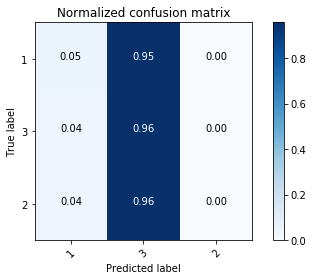

             precision    recall  f1-score   support

          1       0.35      0.02      0.04      2185
          3       0.34      0.94      0.49      2165
          2       0.31      0.05      0.08      2130

avg / total       0.33      0.33      0.20      6480

accuracy:  0.33487654320987653


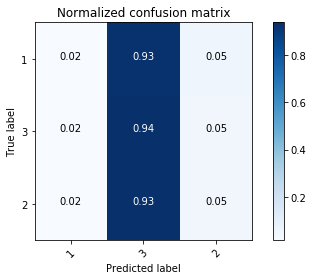

             precision    recall  f1-score   support

          1       0.34      0.02      0.04      2168
          3       0.33      0.94      0.49      2153
          2       0.31      0.04      0.07      2159

avg / total       0.33      0.33      0.20      6480

accuracy:  0.33101851851851855


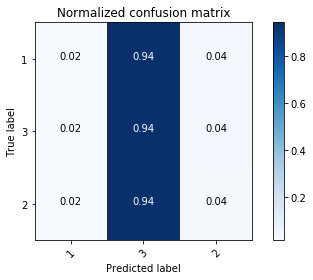

             precision    recall  f1-score   support

          1       0.39      0.05      0.09      2175
          3       0.31      0.06      0.10      2121
          2       0.34      0.90      0.49      2184

avg / total       0.35      0.34      0.23      6480

accuracy:  0.33719135802469136


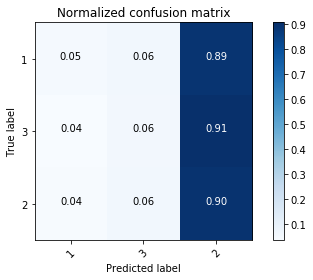

             precision    recall  f1-score   support

          1       0.40      0.02      0.03      2183
          3       0.34      0.74      0.47      2173
          2       0.33      0.25      0.29      2124

avg / total       0.36      0.34      0.26      6480

accuracy:  0.33858024691358024


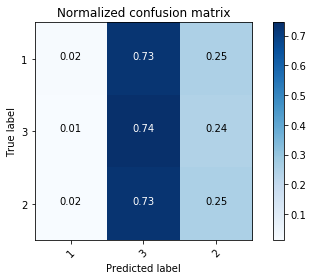

             precision    recall  f1-score   support

          1       0.34      0.02      0.04      2160
          3       0.32      0.94      0.48      2101
          2       0.32      0.03      0.06      2219

avg / total       0.33      0.32      0.19      6480

accuracy:  0.3237654320987654


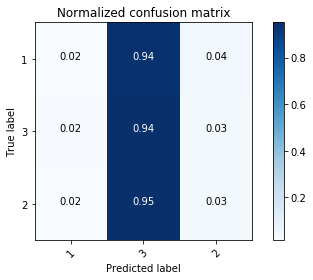

             precision    recall  f1-score   support

          1       0.32      0.03      0.06      2173
          3       0.33      0.94      0.49      2143
          2       0.33      0.03      0.05      2164

avg / total       0.32      0.33      0.20      6480

accuracy:  0.32978395061728394


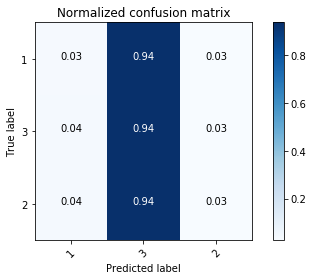

             precision    recall  f1-score   support

          1       0.37      0.03      0.05      2170
          3       0.33      0.94      0.49      2131
          2       0.33      0.04      0.07      2179

avg / total       0.34      0.33      0.20      6480

accuracy:  0.33240740740740743


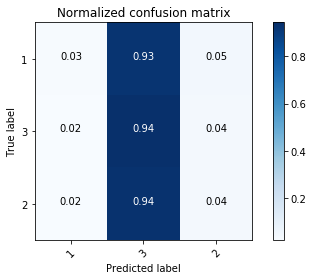

             precision    recall  f1-score   support

          1       0.39      0.03      0.05      2152
          3       0.33      0.96      0.49      2155
          2       0.29      0.02      0.04      2173

avg / total       0.34      0.33      0.19      6480

accuracy:  0.3339506172839506


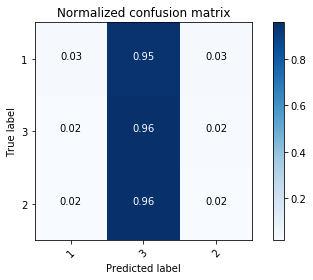

             precision    recall  f1-score   support

          1       0.36      0.02      0.04      2191
          3       0.33      0.95      0.49      2119
          2       0.35      0.03      0.06      2170

avg / total       0.34      0.33      0.19      6480

accuracy:  0.3285493827160494


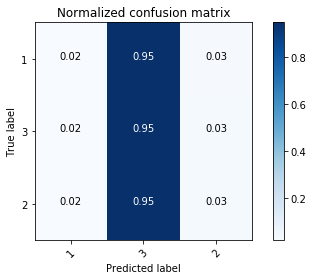

In [10]:
for i in range(5):
    for train_index, test_index in kf.split(nurse):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = MultinomialNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Marketing Dataset

In [42]:
market = pd.read_csv("marketing_numerical.csv") # !!!!!! oxi ready

In [48]:
data = market.iloc[:,0:13]
labelsnum = market.iloc[:,13]
labels = pd.Series((str(i) for i in labelsnum))

             precision    recall  f1-score   support

          1       0.57      0.63      0.60       613
          3       0.17      0.18      0.18       258
          2       0.11      0.11      0.11       264
          5       0.15      0.15      0.15       299
          4       0.12      0.12      0.12       252
          7       0.20      0.19      0.20       439
          6       0.20      0.18      0.19       411
          9       0.27      0.30      0.28       515
          8       0.30      0.26      0.28       387

avg / total       0.27      0.28      0.27      3438

accuracy:  0.2754508435136707


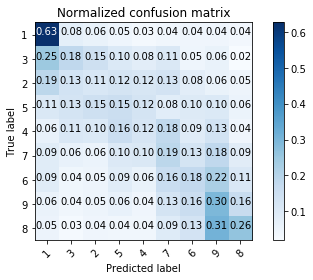

             precision    recall  f1-score   support

          1       0.59      0.57      0.58       642
          3       0.15      0.14      0.15       271
          2       0.12      0.13      0.12       241
          5       0.16      0.17      0.16       319
          4       0.14      0.11      0.12       275
          7       0.17      0.19      0.18       407
          6       0.17      0.18      0.18       373
          9       0.29      0.27      0.28       554
          8       0.27      0.27      0.27       356

avg / total       0.27      0.27      0.27      3438

accuracy:  0.266433973240256


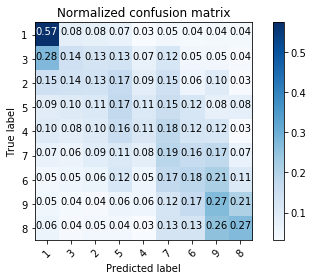

             precision    recall  f1-score   support

          1       0.62      0.62      0.62       636
          3       0.15      0.18      0.16       252
          2       0.12      0.10      0.11       252
          5       0.11      0.14      0.12       295
          4       0.12      0.13      0.13       262
          7       0.18      0.19      0.18       424
          6       0.19      0.17      0.18       417
          9       0.30      0.26      0.28       533
          8       0.28      0.28      0.28       367

avg / total       0.27      0.27      0.27      3438

accuracy:  0.2707969749854567


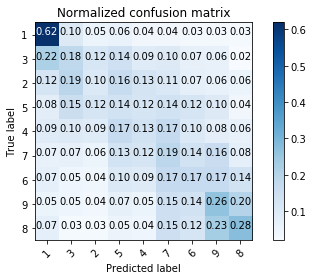

             precision    recall  f1-score   support

          1       0.58      0.62      0.60       619
          3       0.18      0.16      0.17       277
          2       0.14      0.14      0.14       253
          5       0.18      0.17      0.17       323
          4       0.10      0.11      0.10       265
          7       0.18      0.19      0.19       422
          6       0.14      0.16      0.15       367
          9       0.28      0.28      0.28       536
          8       0.28      0.22      0.25       376

avg / total       0.27      0.27      0.27      3438

accuracy:  0.266433973240256


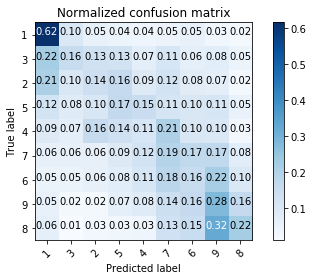

             precision    recall  f1-score   support

          1       0.60      0.61      0.61       648
          3       0.19      0.18      0.19       272
          2       0.15      0.17      0.16       256
          5       0.16      0.16      0.16       308
          4       0.12      0.11      0.11       267
          7       0.20      0.24      0.22       414
          6       0.17      0.15      0.16       412
          9       0.28      0.30      0.29       493
          8       0.31      0.25      0.27       368

avg / total       0.28      0.28      0.28      3438

accuracy:  0.28184991273996507


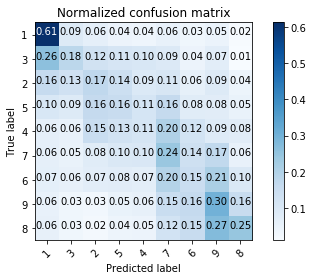

             precision    recall  f1-score   support

          1       0.59      0.61      0.60       607
          3       0.21      0.22      0.21       257
          2       0.17      0.17      0.17       249
          5       0.15      0.15      0.15       310
          4       0.10      0.09      0.10       260
          7       0.19      0.19      0.19       432
          6       0.19      0.22      0.20       372
          9       0.28      0.24      0.26       576
          8       0.29      0.31      0.30       375

avg / total       0.28      0.28      0.28      3438

accuracy:  0.2786503781268179


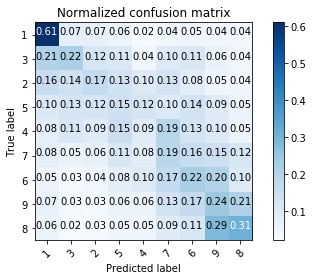

             precision    recall  f1-score   support

          1       0.58      0.57      0.57       617
          3       0.16      0.15      0.15       267
          2       0.12      0.15      0.14       243
          5       0.10      0.11      0.11       299
          4       0.11      0.10      0.10       273
          7       0.17      0.19      0.18       426
          6       0.18      0.17      0.18       400
          9       0.30      0.30      0.30       543
          8       0.32      0.28      0.30       370

avg / total       0.27      0.26      0.26      3438

accuracy:  0.2629435718440954


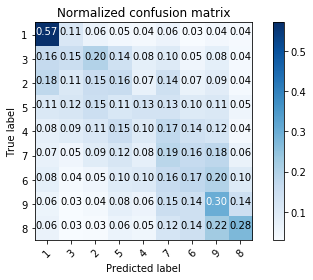

             precision    recall  f1-score   support

          1       0.61      0.61      0.61       638
          3       0.15      0.13      0.14       262
          2       0.15      0.15      0.15       262
          5       0.15      0.14      0.15       319
          4       0.12      0.15      0.13       254
          7       0.17      0.17      0.17       420
          6       0.18      0.17      0.18       384
          9       0.26      0.26      0.26       526
          8       0.30      0.29      0.30       373

avg / total       0.27      0.27      0.27      3438

accuracy:  0.2719604421175102


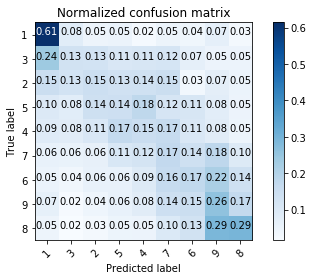

             precision    recall  f1-score   support

          1       0.59      0.60      0.60       631
          3       0.17      0.19      0.18       270
          2       0.18      0.18      0.18       252
          5       0.14      0.16      0.15       309
          4       0.09      0.11      0.10       249
          7       0.18      0.17      0.17       408
          6       0.20      0.19      0.19       437
          9       0.28      0.26      0.27       511
          8       0.34      0.29      0.31       371

avg / total       0.28      0.27      0.28      3438

accuracy:  0.27486910994764396


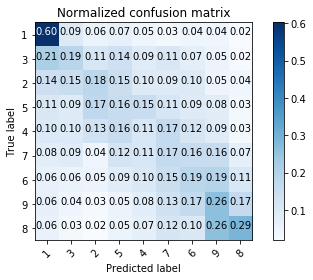

             precision    recall  f1-score   support

          1       0.60      0.62      0.61       624
          3       0.18      0.18      0.18       259
          2       0.14      0.14      0.14       253
          5       0.16      0.17      0.16       309
          4       0.19      0.19      0.19       278
          7       0.21      0.19      0.20       438
          6       0.17      0.22      0.19       347
          9       0.33      0.31      0.32       558
          8       0.30      0.26      0.28       372

avg / total       0.29      0.29      0.29      3438

accuracy:  0.29232111692844676


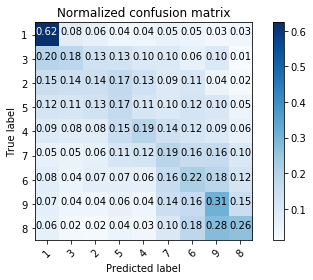

In [49]:
for i in range(5):
    for train_index, test_index in kf.split(market):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()